# Project 2: The Ames Housing Data and House Price Prediction Part 1
## By Evan Jacobs, data genius

First we start off by importing anything and everything that might be helpful here.

In [107]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split



sns.set_style('darkgrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

Next, we import out data files, first saving the names as variables. For some reason, I was getting errors in the step after this, so I went back and changed it to the absolute path and that seemed to work.

In [112]:
train_csv = '/Users/evanjacobs/dsi/DSI-US-4/project-2/train.csv'
test_csv = '/Users/evanjacobs/dsi/DSI-US-4/project-2/test.csv'

For now, we'll just import out training data, so we don't accidentally alter the precious testing data. 

In [113]:
df = pd.read_csv(train_csv)
finaltest = pd.read_csv(test_csv)

First, we're going to do our test train split, and here we'll set our y to be our target, 'SalePrice'.

In [72]:
X = df.drop(['SalePrice'], axis=1)
y = df.SalePrice.values
X_full = df.drop(['SalePrice'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y)

Let's have a look, shall we?

In [73]:
X_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
1018,1780,528431030,20,RL,76.0,10612,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,1,2007,WD
1931,1118,528431120,60,RL,73.0,9801,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2008,WD
1079,2014,903231090,50,RM,NaN,6240,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,3,2007,WD
374,184,902305110,70,RM,60.0,9600,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2010,WD
978,536,531363050,20,RL,63.0,7500,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2009,WD


In [74]:
X_train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
count,1538.000000,1.538000e+03,1538.000000,1290.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1518.000000,...,1537.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000
mean,1466.042263,7.122693e+08,57.093628,68.985271,10055.761378,6.122887,5.555917,1972.218466,1984.492848,100.474967,...,475.744307,93.388166,46.691808,21.791938,2.695709,16.674252,3.197659,52.877113,6.237971,2007.788036
std,842.579820,1.887129e+08,42.431456,23.782384,7293.459355,1.434716,1.077870,29.941785,20.836171,178.317469,...,217.255068,129.897941,65.047772,59.122929,23.490991,57.274350,43.605315,573.162359,2.761255,1.314278
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,744.500000,5.284581e+08,20.000000,58.000000,7424.250000,5.000000,5.000000,1954.000000,1966.000000,0.000000,...,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1492.500000,5.354531e+08,50.000000,68.000000,9314.500000,6.000000,5.000000,1975.000000,1993.000000,0.000000,...,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2186.000000,9.071758e+08,70.000000,80.000000,11425.750000,7.000000,6.000000,2001.000000,2004.000000,163.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1418.000000,1424.000000,523.000000,368.000000,323.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000


In [75]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1538 entries, 1018 to 1609
Data columns (total 80 columns):
Id                 1538 non-null int64
PID                1538 non-null int64
MS SubClass        1538 non-null int64
MS Zoning          1538 non-null object
Lot Frontage       1290 non-null float64
Lot Area           1538 non-null int64
Street             1538 non-null object
Alley              109 non-null object
Lot Shape          1538 non-null object
Land Contour       1538 non-null object
Utilities          1538 non-null object
Lot Config         1538 non-null object
Land Slope         1538 non-null object
Neighborhood       1538 non-null object
Condition 1        1538 non-null object
Condition 2        1538 non-null object
Bldg Type          1538 non-null object
House Style        1538 non-null object
Overall Qual       1538 non-null int64
Overall Cond       1538 non-null int64
Year Built         1538 non-null int64
Year Remod/Add     1538 non-null int64
Roof Style        

In [76]:
X_train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

Closing up the column names so I can use dot notation.

In [77]:
def colclean(column_list): 
    columns=[]
    for n in column_list:
        n = n.lower().replace(' ','')
        columns.append(n)
    return columns
colclean(df.columns)
X_train.columns = colclean(X_train.columns)
X_test.columns = colclean(X_test.columns)
X_train.columns
X_full.columns = colclean(X_full.columns)
finaltest.columns = colclean(finaltest.columns)

Checking for duplicate PIDs. 

In [78]:
X_train.duplicated(subset='pid', keep='first').sum()

0

Got any nulls lying around?

In [79]:
X_train.isnull().sum()

id                  0
pid                 0
mssubclass          0
mszoning            0
lotfrontage       248
lotarea             0
street              0
alley            1429
lotshape            0
landcontour         0
utilities           0
lotconfig           0
landslope           0
neighborhood        0
condition1          0
condition2          0
bldgtype            0
housestyle          0
overallqual         0
overallcond         0
yearbuilt           0
yearremod/add       0
roofstyle           0
roofmatl            0
exterior1st         0
exterior2nd         0
masvnrtype         20
masvnrarea         20
exterqual           0
extercond           0
                 ... 
fullbath            0
halfbath            0
bedroomabvgr        0
kitchenabvgr        0
kitchenqual         0
totrmsabvgrd        0
functional          0
fireplaces          0
fireplacequ       752
garagetype         88
garageyrblt        89
garagefinish       89
garagecars          1
garagearea          1
garagequal

Here's a trick I learned.

In [80]:
X_train.isna().sum()[X_train.isna().sum() !=0]

lotfrontage      248
alley           1429
masvnrtype        20
masvnrarea        20
bsmtqual          46
bsmtcond          46
bsmtexposure      48
bsmtfintype1      46
bsmtfinsf1         1
bsmtfintype2      46
bsmtfinsf2         1
bsmtunfsf          1
totalbsmtsf        1
bsmtfullbath       2
bsmthalfbath       2
fireplacequ      752
garagetype        88
garageyrblt       89
garagefinish      89
garagecars         1
garagearea         1
garagequal        89
garagecond        89
poolqc          1529
fence           1248
miscfeature     1489
dtype: int64

Having a look at what the object column with null values looks like. 

In [81]:
X_train.poolqc.unique()

array([nan, 'Gd', 'Fa', 'TA', 'Ex'], dtype=object)

Just for the sake of time, going to fill all null values with their numerical averages for numerical columns.

In [82]:
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())
X_full = X_full.fillna(X_full.mean())
finaltest = finaltest.fillna(finaltest.mean())

In [83]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1538 entries, 1018 to 1609
Data columns (total 80 columns):
id               1538 non-null int64
pid              1538 non-null int64
mssubclass       1538 non-null int64
mszoning         1538 non-null object
lotfrontage      1538 non-null float64
lotarea          1538 non-null int64
street           1538 non-null object
alley            109 non-null object
lotshape         1538 non-null object
landcontour      1538 non-null object
utilities        1538 non-null object
lotconfig        1538 non-null object
landslope        1538 non-null object
neighborhood     1538 non-null object
condition1       1538 non-null object
condition2       1538 non-null object
bldgtype         1538 non-null object
housestyle       1538 non-null object
overallqual      1538 non-null int64
overallcond      1538 non-null int64
yearbuilt        1538 non-null int64
yearremod/add    1538 non-null int64
roofstyle        1538 non-null object
roofmatl         1538 no

Breaking dataframes into two where one is all num values and one is all obj values so I can look at them more easily.

In [84]:
X_tr_obj = X_train.select_dtypes(exclude=[np.number])
X_tr_num = X_train.select_dtypes(include=[np.number])
X_ts_obj = X_test.select_dtypes(exclude=[np.number])
X_ts_num = X_test.select_dtypes(include=[np.number])
X_full_obj = X_full.select_dtypes(exclude=[np.number])
X_full_num = X_full.select_dtypes(include=[np.number])
finaltest_obj = finaltest.select_dtypes(exclude=[np.number])
finaltest_num = finaltest.select_dtypes(include=[np.number])

In [85]:
X_ts_num

,id,pid,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremod/add,masvnrarea,...,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,miscval,mosold,yrsold
997,2492,532376180,20,65.000000,8450,5,6,1968,1968,90.0,...,0,155,0,0,0,0,NaN,0,11,2006
704,1298,902134100,30,60.000000,6756,5,6,1910,1950,0.0,...,0,0,96,0,0,0,NaN,0,9,2008
854,2873,910200020,30,50.000000,7288,5,6,1942,1950,0.0,...,160,0,0,0,0,0,NaN,0,8,2006
1399,1401,905352070,20,82.000000,20270,7,6,1979,1979,0.0,...,140,0,0,0,0,0,NaN,0,4,2008
1832,364,527166010,60,69.264501,10762,7,5,1999,1999,344.0,...,0,0,0,0,0,0,NaN,0,5,2009
1838,935,909451140,160,24.000000,1612,6,6,1980,1980,0.0,...,154,0,0,0,0,0,NaN,0,7,2009
1258,2575,535152280,20,70.000000,8400,5,5,1957,1957,0.0,...,0,60,0,0,0,0,NaN,0,3,2006
187,1779,528429110,20,49.000000,15256,8,5,2007,2007,84.0,...,168,160,0,0,0,0,NaN,0,8,2007
951,1319,902330010,70,50.000000,5250,8,5,1872,1987,0.0,...,0,54,20,0,0,0,NaN,0,12,2008
1406,1228,534479150,20,63.000000,7584,5,5,1953,1953,88.0,...,120,24,0,0,0,0,NaN,0,6,2008


Checking to make sure it worked. 

In [86]:
print(X_train.shape)
print(X_tr_obj.shape)
print(X_tr_num.shape)

(1538, 80)
(1538, 42)
(1538, 38)


Let's check for potential outliers.

In [87]:
X_tr_num.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1538.0,1.466042e+03,8.425798e+02,1.0,7.445000e+02,1.492500e+03,2.186000e+03,2930.0
pid,1538.0,7.122693e+08,1.887129e+08,526301100.0,5.284581e+08,5.354531e+08,9.071758e+08,924152030.0
mssubclass,1538.0,5.709363e+01,4.243146e+01,20.0,2.000000e+01,5.000000e+01,7.000000e+01,190.0
lotfrontage,1538.0,6.898527e+01,2.177935e+01,21.0,6.000000e+01,6.898527e+01,7.800000e+01,313.0
lotarea,1538.0,1.005576e+04,7.293459e+03,1300.0,7.424250e+03,9.314500e+03,1.142575e+04,159000.0
overallqual,1538.0,6.122887e+00,1.434716e+00,1.0,5.000000e+00,6.000000e+00,7.000000e+00,10.0
overallcond,1538.0,5.555917e+00,1.077870e+00,1.0,5.000000e+00,5.000000e+00,6.000000e+00,9.0
yearbuilt,1538.0,1.972218e+03,2.994178e+01,1875.0,1.954000e+03,1.975000e+03,2.001000e+03,2010.0
yearremod/add,1538.0,1.984493e+03,2.083617e+01,1950.0,1.966000e+03,1.993000e+03,2.004000e+03,2010.0
masvnrarea,1538.0,1.004750e+02,1.771535e+02,0.0,0.000000e+00,0.000000e+00,1.600000e+02,1600.0


Obviously, some of the maxes are large, but that's the way real estate works. Otherwise, nothing here pops out as being wroong. 

Okay, now that we have separated our dataframe into a numerical one and a categorical one, let's take a look-see at the numerical correlations.

In [88]:
X_tr_num['sp']=y_train
X_tr_num

/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,id,pid,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremod/add,masvnrarea,...,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,sp
1018,1780,528431030,20,76.000000,10612,8,5,2006,2006,248.000000,...,168,46,0,0,0,0,0,1,2007,215000
1931,1118,528431120,60,73.000000,9801,8,5,2007,2007,156.000000,...,144,60,0,0,0,0,0,7,2008,257000
1079,2014,903231090,50,68.985271,6240,6,5,1938,1950,0.000000,...,225,0,84,0,0,0,0,3,2007,126000
374,184,902305110,70,60.000000,9600,8,9,1900,2003,0.000000,...,54,228,246,0,0,0,0,4,2010,150000
978,536,531363050,20,63.000000,7500,6,5,2004,2004,0.000000,...,0,50,0,0,0,0,0,8,2009,143500
587,975,923225490,20,62.000000,9858,5,6,1968,1968,0.000000,...,33,0,0,0,0,0,600,11,2009,130000
412,1549,910203020,30,71.000000,6900,5,6,1940,1955,0.000000,...,0,25,0,0,0,0,0,2,2008,120500
166,1320,902401010,50,68.985271,5700,7,7,1926,1950,0.000000,...,0,0,176,0,0,0,0,8,2008,116900
1779,400,527405180,20,70.000000,8120,4,7,1970,1970,0.000000,...,0,0,0,0,0,0,0,7,2009,124500
2035,2862,909279040,30,80.000000,11600,4,5,1922,1950,0.000000,...,0,0,67,0,0,0,0,7,2006,137500


In [89]:
abs(X_tr_num.corr().sp)

id               0.047547
pid              0.267597
mssubclass       0.095592
lotfrontage      0.318741
lotarea          0.301374
overallqual      0.799418
overallcond      0.114950
yearbuilt        0.577287
yearremod/add    0.540100
masvnrarea       0.519581
bsmtfinsf1       0.417304
bsmtfinsf2       0.024065
bsmtunfsf        0.210097
totalbsmtsf      0.633981
1stflrsf         0.620790
2ndflrsf         0.251470
lowqualfinsf     0.046227
grlivarea        0.702253
bsmtfullbath     0.289372
bsmthalfbath     0.043568
fullbath         0.535411
halfbath         0.293439
bedroomabvgr     0.145406
kitchenabvgr     0.129250
totrmsabvgrd     0.517462
fireplaces       0.470631
garageyrblt      0.506175
garagecars       0.642726
garagearea       0.638193
wooddecksf       0.341659
openporchsf      0.323471
enclosedporch    0.127035
3ssnporch        0.070299
screenporch      0.134954
poolarea         0.025787
miscval          0.007560
mosold           0.055951
yrsold           0.020305
sp          

For this first model, we're going to choose all the columns where the correlation coefficient with SalePrice is greater than or equal to some value I determine.

In [90]:
vals = abs(X_tr_num.corr().sp).drop('sp').sort_values(ascending=False)
corr_cols = list(vals[vals >= 0.3].index)

X_tr_mod1 = X_tr_num[corr_cols]
X_ts_mod1 = X_ts_num[corr_cols]
X_full_mod1 = X_full_num[corr_cols]
finaltest_num = finaltest_num[corr_cols]

corr_cols

['overallqual',
 'grlivarea',
 'garagecars',
 'garagearea',
 'totalbsmtsf',
 '1stflrsf',
 'yearbuilt',
 'yearremod/add',
 'fullbath',
 'masvnrarea',
 'totrmsabvgrd',
 'garageyrblt',
 'fireplaces',
 'bsmtfinsf1',
 'wooddecksf',
 'openporchsf',
 'lotfrontage',
 'lotarea']

First, let's just notice that garageyrblt, yearbuilt should be correlated, as well as garagearea, garagecars, as well as totalbsmtsf, masvnrarea, grlivarea, 1stflrsf. So let's make some interaction variables. 

In [91]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2, interaction_only=False, 
                         include_bias=True)
pf.fit(X_tr_mod1)
X_tr_mod1 = pf.transform(X_tr_mod1)
X_ts_mod1 = pf.transform(X_ts_mod1)
X_full_mod1 = pf.transform(X_full_mod1)
finaltest_num = pf.transform(finaltest_num)

Okay, now let's use a standard scalar to make everything line up nicely. 

In [92]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_tr_mod1 = ss.fit_transform(X_tr_mod1)
X_ts_mod1 = ss.transform(X_ts_mod1)
X_full_mod1 = ss.fit_transform(X_full_mod1)
finaltest_num = ss.transform(finaltest_num)

So, for lasso, ridge, and enet, I played with different alpha ranges, different numbers of iterations, and also different correlation thresholds. 

Let's try a lasso!

In [93]:
l_alphas = np.arange(.001, .15, .0025)
lasso_model = LassoCV(alphas=l_alphas, max_iter=2000, cv=5)
# lasso_model = LassoCV(max_iter=10000, cv=5)

model_1 = lasso_model.fit(X_tr_mod1, y_train)

/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Great, let's score the lasso.

In [94]:
print(model_1.score(X_ts_mod1, y_test))

0.8531253453633401


Hey, that's not a bad score at all! What if we tried ridge? 

In [102]:
ridge_alphas = np.logspace(0, 5, 200)

ridge_model = RidgeCV(alphas=ridge_alphas, cv=10)
# ridge_model = RidgeCV(cv=10)
ridge_model.fit(X_tr_mod1, y_train)

RidgeCV(alphas=array([1.00000e+00, 1.05956e+00, ..., 9.43788e+04, 1.00000e+05]),
    cv=10, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)

In [ ]:
ridge = Ridge(alpha=ridge_model.alpha_)

ridge_scores = cross_val_score(ridge, X_ts_mod1, y_test, cv=15)

print(ridge_scores)
print(np.mean(ridge_scores))

Hmmm. And last, everyone's favorite, the elastic net. 

In [ ]:
l1_ratios = np.linspace(0.01, 1.0, 25)

enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10,
                            verbose=0)
# enet = ElasticNetCV(cv=10, verbose=0)
enet.fit(X_tr_mod1, y_train)

print(enet.alpha_)
print(enet.l1_ratio_)


In [ ]:
enet = ElasticNet(alpha=enet.alpha_, l1_ratio=enet.l1_ratio_)

enet_scores = cross_val_score(enet, X_ts_mod1, y_test, cv=10)

print(enet_scores)
print(np.mean(enet_scores))


It's basically the same. But I have discovered that as I decreased my cut off for correlation, my lasso score remained largely the same, but my ridge and enet scores went up a tiny bit, culminating with my pulling an R-squared on .89 from Elastic Net. 

In [99]:
# l_alphas = np.arange(.001, .15, .0025)
# lasso_model_final = LassoCV(alphas=l_alphas, cv=5)
# model_1_final = lasso_model.fit(X_full_mod1, y)

enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10,
                            verbose=0)
model_1_final = enet.fit(X_full_mod1, y)


/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


This is how I send my model's predictions to a file.

In [100]:
evansubmission1 = pd.DataFrame(data = model_1_final.predict(finaltest_num), columns = ['SalePrice'], index=finaltest['id'])
evansubmission1.to_csv('./evansubmission1.csv')

Plotting my test predictions vs. my test y for a nice visualization of the efficacy of my model. 

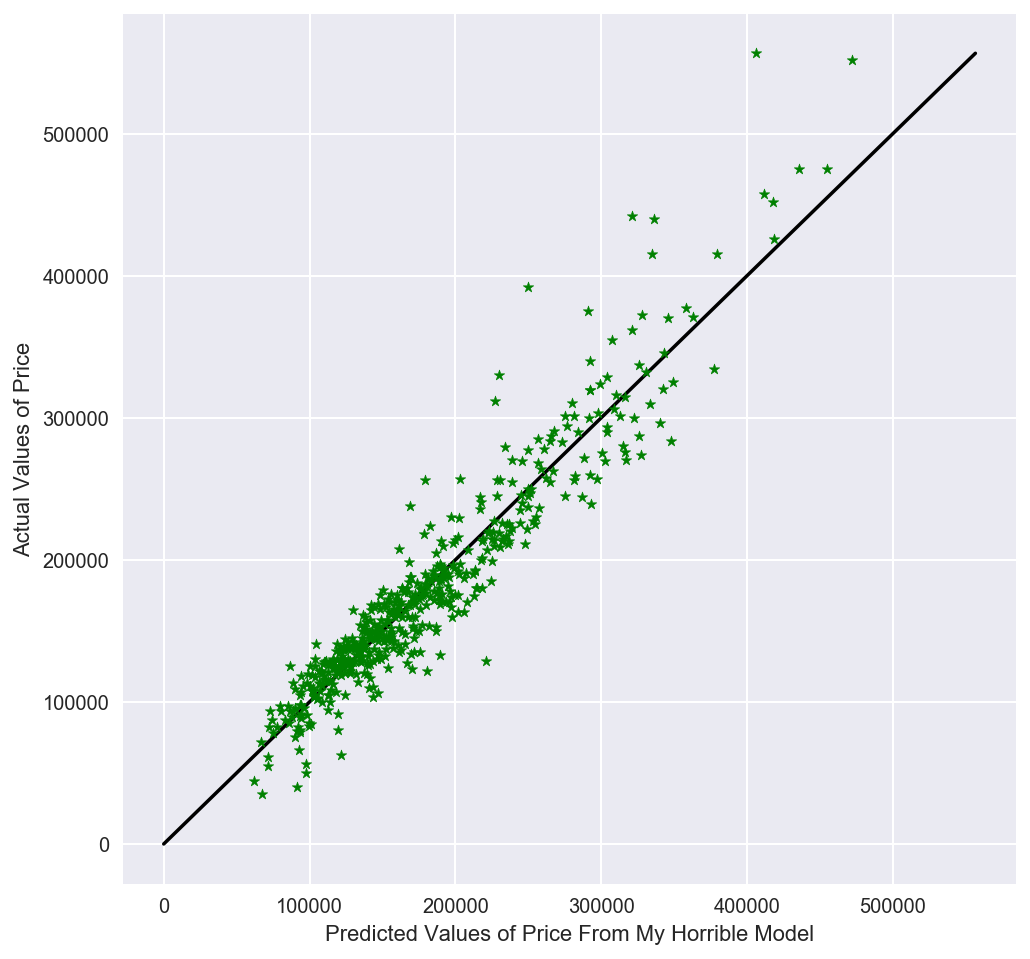

/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You 

score:  0.8773479828283166


In [103]:
predictions = model_1_final.predict(X_ts_mod1)
y = y_test

# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predictions, y, s=30, c='g', marker='*', zorder=10)
plt.xlabel("Predicted Values of Price From My Horrible Model")
plt.ylabel("Actual Values of Price")

plt.plot([0, np.max(y)], [0, np.max(y)], c = 'k')

plt.show()
score = cross_val_score(model_1_final, X_ts_mod1, y_test, cv=10)
print("score: ", score.mean())

And that's it for the first model! Don't forget to look at the other two model files. Below, some code scraps, the instructions for the lab, and the data dictionary.

In [ ]:
# Joe's way of concatenating and then unconcatenating
# def get_dummied(train, test):
#     list = ['MS SubClass']
#     for i in train.columns:
#         if train[i].dtype == object:
#             list.append(i)
            
#     full_data = pd.concat([train, test], axis=0)
#     full_data = pd.get_dummies(full_data, columns=list, drop_first=True)
    
#     X_dummied = full_data[:len(train)]
#     test_dummied = full_data[len(train):]

#     return X_dummied, test_dummied 

# Xd, testd = get_dummied(X, test)



In [36]:
# evansubmission1 = pd.DataFrame(data = model_1.predict(X_ts_mod1), columns = ['SalePrice'], index=y_test['Id'])
# evansubmission1.to_csv('./evansubmission1.csv')

Project 2 - Ames Housing Data and Kaggle Challenge
Due Date: May 18, 2018

Welcome to Project 2! It's time to start modeling.

Creating and iteratively refining a regression model
Using Kaggle to practice the modeling process
You are tasked with creating a regression model based on the Ames Housing Dataset. This model will predict the price of a house at sale.

The Ames Housing Dataset is an exceptionally detailed and robust dataset with over 70 columns of different features relating to houses.

Secondly, we are hosting a competition on Kaggle to give you the opportunity to practice the following skills:

Refining models over time
Use of train-test split, cross-validation, and data with unknown values for the target to simulate the modeling process
The use of Kaggle as a place to practice data science
Set-up
Before you begin working on this project, please do the following:

Sign up for an account on Kaggle
IMPORTANT: Click this link (Regression Challenge Sign Up) to join the competition (otherwise you will not be able to make submissions!)
Review the material on the DSI-US-4 Regression Challenge
The Modeling Process
The train dataset has all of the columns that you will need to generate and refine your models. The test dataset has all of those columns except for the target that you are trying to predict in your Regression model.
Generate your regression model using the training data. We expect that within this process, you'll be making use of:
train-test split
cross-validation / grid searching for hyperparameters
strong exploratory data analysis to question correlation and relationship across predictive variables
code that reproducibly and consistently applies feature transformation (such as the preprocessing library)
Predict the values for your target column in the test dataset and submit your predictions to Kaggle to see how your model does against unknown data.
Note: Kaggle expects to see your submissions in a specific format. Check the challenge's page to make sure you are formatting your files correctly!
Submission Checklist
We expect the following to be submitted by end of day on the due date.

Your code for the regression model, including your exploratory data analysis. Add your (well organized!) notebooks to this repository and submit a pull request.
At least one successful prediction submission on DSI-US-4 Regression Challenge -- you should see your name in the "Leaderboard" tab.
Check the Project Feedback + Evaluation section (below) to ensure that you know what will factor into the evaluation of your work.
Project Feedback + Evaluation
For all projects, students will be evaluated on a simple 4 point scale (0-3 inclusive). Instructors will use this rubric when scoring student performance on each of the core project requirements:

Score	Expectations
0	Does not meet expectations. Try again.
1	Approaching expectations. Getting there...
2	Meets expecations. Great job.
3	Surpasses expectations. Brilliant!
For Project 2 the evaluation categories are as follows:

Organization:	Clearly commented, annotated and sectioned Jupyter notebook or Python script. Comments and annotations add clarity, explanation and intent to the work. Notebook is well-structured with title, author and sections. Assumptions are stated and justified.
Presentation: The goal, methodology and results of your work are presented in a clear, concise and thorough manner. The presentation is appropriate for the specified audience, and includes relevant and enlightening visual aides as appropriate.
Data Structures: Python data structures including lists, dictionaries and imported structures (e.g. DataFrames), are created and used correctly. The appropriate data structures are used in context. Data structures are created and accessed using appropriate mechanisms such as comprehensions, slices, filters and copies.
Python Syntax and Control Flow: Python code is written correctly and follows standard style guidelines and best practices. There are no runtime errors. The code is expressive while being reasonably concise.
Modeling: Data is appropriately prepared for modeling. Model choice matches the context of the data and the analysis. Model hyperparameters are optimized. Model evaluation is robust. Model results are extracted and explained either visually, numerically or narratively.
Regression Challenge Submission: Student has made at least one successful submission to the DSI-US-4 Regression Challenge
Your final assessment ("grade" if you will) will be calculated based on a topical rubric. For each category, you will receive a score of 0-3. From the rubric you can see descriptions of each score and what is needed to attain those scores.

Welcome the Kaggle challenge for Project 2! As part of a successful submission for Project 2, we will expect you to make at least one (and hopefully, multiple!) submissions towards this regression challenge.

In this challenge, you will use the well known Ames housing data to create a regression model that predicts the price of houses in Ames, IA. You should feel free to use any and all features that are present in this dataset.

Goal
It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.

Evaluation
Kaggle leaderboard standings will be determined by root mean squared error (RMSE).


RMSE=∑(ŷ i−yi)2n‾‾‾‾‾‾‾‾‾‾‾‾‾√
Submission File Format
The file should contain a header and have the following format:.

<!-- Begin Base Rules -->
<h3>One account per participant</h3>
<p>You cannot sign up to Kaggle from multiple accounts and therefore you cannot submit from multiple accounts.</p>
<h3>No private sharing outside teams</h3>
<p>
    Privately sharing code or data outside of teams is not permitted.
    It's okay to share code if made available to all participants on the forums.
</p>
<h3>Team Mergers</h3>
<p>Team mergers are not allowed in this competition.</p>

<h3>Team Limits</h3>
<p>There is no maximum team size.</p>
<h3>Submission Limits</h3>
<p>You may submit a maximum of 2 entries per day.</p>
<p>You may select up to 2 final submissions for judging.</p>
<h3>Competition Timeline</h3>
<p>Start Date: <strong>TBA</strong></p>
<p>Merger Deadline: <strong>None</strong></p>
<p>Entry Deadline: <strong>None</strong></p>
<p>End Date: <strong>2/1/2014 12:00 AM UTC</strong></p>
<!-- End Base Rules -->

In [37]:
# There are three files:

# train.csv -- this data contains all of the training data for your model.
# The target variable (SalePrice) is removed from the test set!
# test.csv -- this data contains the test data for your model. You will feed this data into your regression model to make predictions.
# sample_sub_reg.csv -- An example of a correctly formatted submission for this challenge (with a random number provided as predictions for SalePrice. Please ensure that your submission to Kaggle matches this format.
# Codebook / Data Dictionary:

# SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict for this challenge.
# MSSubClass: The building class
#     20 1-STORY 1946 & NEWER ALL STYLES
#     30 1-STORY 1945 & OLDER
#     40 1-STORY W/FINISHED ATTIC ALL AGES
#     45 1-1/2 STORY - UNFINISHED ALL AGES
#     50 1-1/2 STORY FINISHED ALL AGES
#     60 2-STORY 1946 & NEWER
#     70 2-STORY 1945 & OLDER
#     75 2-1/2 STORY ALL AGES
#     80 SPLIT OR MULTI-LEVEL
#     85 SPLIT FOYER
#     90 DUPLEX - ALL STYLES AND AGES
#     120 1-STORY PUD (Planned Unit Development) - 1946 & NEWER
#     150 1-1/2 STORY PUD - ALL AGES
#     160 2-STORY PUD - 1946 & NEWER
#     180 PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
#     190 2 FAMILY CONVERSION - ALL STYLES AND AGES
# MSZoning: Identifies the general zoning classification of the sale.
#     A Agriculture
#     C Commercial
#     FV Floating Village Residential
#     I Industrial
#     RH Residential High Density
#     RL Residential Low Density
#     RP Residential Low Density Park
#     RM Residential Medium Density
# LotFrontage: Linear feet of street connected to property
# LotArea: Lot size in square feet
# Street: Type of road access to property
#     Grvl Gravel
#     Pave Paved
# Alley: Type of alley access to property
#     Grvl Gravel
#     Pave Paved
#     NA No alley access
# LotShape: General shape of property
#     Reg Regular
#     IR1 Slightly irregular
#     IR2 Moderately Irregular
#     IR3 Irregular
# LandContour: Flatness of the property
#     Lvl Near Flat/Level
#     Bnk Banked - Quick and significant rise from street grade to building
#     HLS Hillside - Significant slope from side to side
#     Low Depression
# Utilities: Type of utilities available
#     AllPub All public Utilities (E,G,W,& S)
#     NoSewr Electricity, Gas, and Water (Septic Tank)
#     NoSeWa Electricity and Gas Only
#     ELO Electricity only
# LotConfig: Lot configuration
#     Inside Inside lot
#     Corner Corner lot
#     CulDSac Cul-de-sac
#     FR2 Frontage on 2 sides of property
#     FR3 Frontage on 3 sides of property
# LandSlope: Slope of property
#     Gtl Gentle slope
#     Mod Moderate Slope
#     Sev Severe Slope
# Neighborhood: Physical locations within Ames city limits
#     Blmngtn Bloomington Heights
#     Blueste Bluestem
#     BrDale Briardale
#     BrkSide Brookside
#     ClearCr Clear Creek
#     CollgCr College Creek
#     Crawfor Crawford
#     Edwards Edwards
#     Gilbert Gilbert
#     IDOTRR Iowa DOT and Rail Road
#     MeadowV Meadow Village
#     Mitchel Mitchell
#     Names North Ames
#     NoRidge Northridge
#     NPkVill Northpark Villa
#     NridgHt Northridge Heights
#     NWAmes Northwest Ames
#     OldTown Old Town
#     SWISU South & West of Iowa State University
#     Sawyer Sawyer
#     SawyerW Sawyer West
#     Somerst Somerset
#     StoneBr Stone Brook
#     Timber Timberland
#     Veenker Veenker
# Condition1: Proximity to main road or railroad
#     Artery Adjacent to arterial street
#     Feedr Adjacent to feeder street
#     Norm Normal
#     RRNn Within 200' of North-South Railroad
#     RRAn Adjacent to North-South Railroad
#     PosN Near positive off-site feature--park, greenbelt, etc.
#     PosA Adjacent to postive off-site feature
#     RRNe Within 200' of East-West Railroad
#     RRAe Adjacent to East-West Railroad
# Condition2: Proximity to main road or railroad (if a second is present)
#     Artery Adjacent to arterial street
#     Feedr Adjacent to feeder street
#     Norm Normal
#     RRNn Within 200' of North-South Railroad
#     RRAn Adjacent to North-South Railroad
#     PosN Near positive off-site feature--park, greenbelt, etc.
#     PosA Adjacent to postive off-site feature
#     RRNe Within 200' of East-West Railroad
#     RRAe Adjacent to East-West Railroad
# BldgType: Type of dwelling
#     1Fam Single-family Detached
#     2FmCon Two-family Conversion; originally built as one-family dwelling
#     Duplx Duplex
#     TwnhsE Townhouse End Unit
#     TwnhsI Townhouse Inside Unit
# HouseStyle: Style of dwelling
#     1Story One story
#     1.5Fin One and one-half story: 2nd level finished
#     1.5Unf One and one-half story: 2nd level unfinished
#     2Story Two story
#     2.5Fin Two and one-half story: 2nd level finished
#     2.5Unf Two and one-half story: 2nd level unfinished
#     SFoyer Split Foyer
#     SLvl Split Level
# OverallQual: Overall material and finish quality
#     10 Very Excellent
#     9 Excellent
#     8 Very Good
#     7 Good
#     6 Above Average
#     5 Average
#     4 Below Average
#     3 Fair
#     2 Poor
#     1 Very Poor
# OverallCond: Overall condition rating
#     10 Very Excellent
#     9 Excellent
#     8 Very Good
#     7 Good
#     6 Above Average
#     5 Average
#     4 Below Average
#     3 Fair
#     2 Poor
#     1 Very Poor
# YearBuilt: Original construction date
# YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
# RoofStyle: Type of roof
#     Flat Flat
#     Gable Gable
#     Gambrel Gabrel (Barn)
#     Hip Hip
#     Mansard Mansard
#     Shed Shed
# RoofMatl: Roof material
#     ClyTile Clay or Tile
#     CompShg Standard (Composite) Shingle
#     Membran Membrane
#     Metal Metal
#     Roll Roll
#     Tar&Grv Gravel & Tar
#     WdShake Wood Shakes
#     WdShngl Wood Shingles
# Exterior1st: Exterior covering on house
#     AsbShng Asbestos Shingles
#     AsphShn Asphalt Shingles
#     BrkComm Brick Common
#     BrkFace Brick Face
#     CBlock Cinder Block
#     CemntBd Cement Board
#     HdBoard Hard Board
#     ImStucc Imitation Stucco
#     MetalSd Metal Siding
#     Other Other
#     Plywood Plywood
#     PreCast PreCast
#     Stone Stone
#     Stucco Stucco
#     VinylSd Vinyl Siding
#     Wd Sdng Wood Siding
#     WdShing Wood Shingles
# Exterior2nd: Exterior covering on house (if more than one material)
#     AsbShng Asbestos Shingles
#     AsphShn Asphalt Shingles
#     BrkComm Brick Common
#     BrkFace Brick Face
#     CBlock Cinder Block
#     CemntBd Cement Board
#     HdBoard Hard Board
#     ImStucc Imitation Stucco
#     MetalSd Metal Siding
#     Other Other
#     Plywood Plywood
#     PreCast PreCast
#     Stone Stone
#     Stucco Stucco
#     VinylSd Vinyl Siding
#     Wd Sdng Wood Siding
#     WdShing Wood Shingles
# MasVnrType: Masonry veneer type
#     BrkCmn Brick Common
#     BrkFace Brick Face
#     CBlock Cinder Block
#     None None
#     Stone Stone
# MasVnrArea: Masonry veneer area in square feet
# ExterQual: Exterior material quality
#     Ex Excellent
#     Gd Good
#     TA Average/Typical
#     Fa Fair
#     Po Poor
# ExterCond: Present condition of the material on the exterior
#     Ex Excellent
#     Gd Good
#     TA Average/Typical
#     Fa Fair
#     Po Poor
# Foundation: Type of foundation
#     BrkTil Brick & Tile
#     CBlock Cinder Block
#     PConc Poured Contrete
#     Slab Slab
#     Stone Stone
#     Wood Wood
# BsmtQual: Height of the basement
#     Ex Excellent (100+ inches)
#     Gd Good (90-99 inches)
#     TA Typical (80-89 inches)
#     Fa Fair (70-79 inches)
#     Po Poor (<70 inches)
#     NA No Basement
# BsmtCond: General condition of the basement
#     Ex Excellent
#     Gd Good
#     TA Typical - slight dampness allowed
#     Fa Fair - dampness or some cracking or settling
#     Po Poor - Severe cracking, settling, or wetness
#     NA No Basement
# BsmtExposure: Walkout or garden level basement walls
#     Gd Good Exposure
#     Av Average Exposure (split levels or foyers typically score average or above)
#     Mn Mimimum Exposure
#     No No Exposure
#     NA No Basement
# BsmtFinType1: Quality of basement finished area
#     GLQ Good Living Quarters
#     ALQ Average Living Quarters
#     BLQ Below Average Living Quarters
#     Rec Average Rec Room
#     LwQ Low Quality
#     Unf Unfinshed
#     NA No Basement
# BsmtFinSF1: Type 1 finished square feet
# BsmtFinType2: Quality of second finished area (if present)
#     GLQ Good Living Quarters
#     ALQ Average Living Quarters
#     BLQ Below Average Living Quarters
#     Rec Average Rec Room
#     LwQ Low Quality
#     Unf Unfinshed
#     NA No Basement
# BsmtFinSF2: Type 2 finished square feet
# BsmtUnfSF: Unfinished square feet of basement area
# TotalBsmtSF: Total square feet of basement area
# Heating: Type of heating
#     Floor Floor Furnace
#     GasA Gas forced warm air furnace
#     GasW Gas hot water or steam heat
#     Grav Gravity furnace
#     OthW Hot water or steam heat other than gas
#     Wall Wall furnace
# HeatingQC: Heating quality and condition
#     Ex Excellent
#     Gd Good
#     TA Average/Typical
#     Fa Fair
#     Po Poor
# CentralAir: Central air conditioning
#     N No
#     Y Yes
# Electrical: Electrical system
#     SBrkr Standard Circuit Breakers & Romex
#     FuseA Fuse Box over 60 AMP and all Romex wiring (Average)
#     FuseF 60 AMP Fuse Box and mostly Romex wiring (Fair)
#     FuseP 60 AMP Fuse Box and mostly knob & tube wiring (poor)
#     Mix Mixed
# 1stFlrSF: First Floor square feet
# 2ndFlrSF: Second floor square feet
# LowQualFinSF: Low quality finished square feet (all floors)
# GrLivArea: Above grade (ground) living area square feet
# BsmtFullBath: Basement full bathrooms
# BsmtHalfBath: Basement half bathrooms
# FullBath: Full bathrooms above grade
# HalfBath: Half baths above grade
# Bedroom: Number of bedrooms above basement level
# Kitchen: Number of kitchens
# KitchenQual: Kitchen quality
#     Ex Excellent
#     Gd Good
#     TA Typical/Average
#     Fa Fair
#     Po Poor
# TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
# Functional: Home functionality rating
#     Typ Typical Functionality
#     Min1 Minor Deductions 1
#     Min2 Minor Deductions 2
#     Mod Moderate Deductions
#     Maj1 Major Deductions 1
#     Maj2 Major Deductions 2
#     Sev Severely Damaged
#     Sal Salvage only
# Fireplaces: Number of fireplaces
# FireplaceQu: Fireplace quality
#     Ex Excellent - Exceptional Masonry Fireplace
#     Gd Good - Masonry Fireplace in main level
#     TA Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
#     Fa Fair - Prefabricated Fireplace in basement
#     Po Poor - Ben Franklin Stove
#     NA No Fireplace
# GarageType: Garage location
#     2Types More than one type of garage
#     Attchd Attached to home
#     Basment Basement Garage
#     BuiltIn Built-In (Garage part of house - typically has room above garage)
#     CarPort Car Port
#     Detchd Detached from home
#     NA No Garage
# GarageYrBlt: Year garage was built
# GarageFinish: Interior finish of the garage
#     Fin Finished
#     RFn Rough Finished
#     Unf Unfinished
#     NA No Garage
# GarageCars: Size of garage in car capacity
# GarageArea: Size of garage in square feet
# GarageQual: Garage quality
#     Ex Excellent
#     Gd Good
#     TA Typical/Average
#     Fa Fair
#     Po Poor
#     NA No Garage
#     GarageCond: Garage condition
#     Ex Excellent
#     Gd Good
#     TA Typical/Average
#     Fa Fair
#     Po Poor
#     NA No Garage
# PavedDrive: Paved driveway
#     Y Paved
#     P Partial Pavement
#     N Dirt/Gravel
# WoodDeckSF: Wood deck area in square feet
# OpenPorchSF: Open porch area in square feet
# EnclosedPorch: Enclosed porch area in square feet
# 3SsnPorch: Three season porch area in square feet
# ScreenPorch: Screen porch area in square feet
# PoolArea: Pool area in square feet
# PoolQC: Pool quality
#     Ex Excellent
#     Gd Good
#     TA Average/Typical
#     Fa Fair
#     NA No Pool
# Fence: Fence quality
#     GdPrv Good Privacy
#     MnPrv Minimum Privacy
#     GdWo Good Wood
#     MnWw Minimum Wood/Wire
#     NA No Fence
# MiscFeature: Miscellaneous feature not covered in other categories
#     Elev Elevator
#     Gar2 2nd Garage (if not described in garage section)
#     Othr Other
#     Shed Shed (over 100 SF)
#     TenC Tennis Court
#     NA None
# MiscVal: $Value of miscellaneous feature
# MoSold: Month Sold
# YrSold: Year Sold
# SaleType: Type of sale
#     WD Warranty Deed - Conventional
#     CWD Warranty Deed - Cash
#     VWD Warranty Deed - VA Loan
#     New Home just constructed and sold
#     COD Court Officer Deed/Estate
#     Con Contract 15% Down payment regular terms
#     ConLw Contract Low Down payment and low interest
#     ConLI Contract Low Interest
#     ConLD Contract Low Down
#     Oth Other
